NIX File Fromat Demonstration
=============================

Demonstration of the NIX file format for the INCF Electrophysiology Data-Sharing Task Force 2014 in Leiden.

It all starts with importing the Python bindings for nix and importing basic libraries.

In [1]:
from __future__ import print_function
import nixio as nix
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Data Writing
============
Let's start the real deal by creating a new NIX file

In [2]:
nf = nix.File.open('nix-demo-1.nix.h5', nix.FileMode.Overwrite)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691]


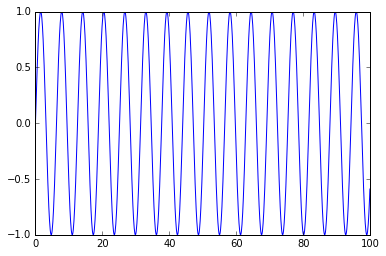

In [3]:
step = 0.1
x = np.arange(0, 100, step)
y = np.sin(x)
print(x[:10])
print(y[:10])
plt.plot(x, y)

In [4]:
block = nf.create_block('test data set', 'nix.test.dataset')
print(block)

Block: {name = test data set, type = nix.test.dataset, id = 207d59c7-ba2e-4b5c-9ddc-2694bb36a717}


In [5]:
array = block.create_data_array('the_data', 'sin_data', nix.DataType.Double, y.shape)
array.data[:] = y

In [6]:
print(array.data[:10])

[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691]


In [7]:
dim = array.create_sampled_dimension(1, step)

In [8]:
dim.label = 'x'
dim.unit = 's'

Data Reading
============

Let's read a NIX file created by [RELACS](http://relacs.sourceforge.net) - source code for RELACS with NIX support on [GitHub](https://github.com/relacs/relacs)
![RELACS Logo](http://relacs.sourceforge.net/relacstux.png)
![RELACS Screenshot](http://relacs.sourceforge.net/screenshots/RelacsAuditorySingleStimulus2.png)

In [9]:
nf = nix.File.open('2014-08-21-am.nix.h5')

Explore the data by listing all the blocks and all the DataArrays inside each block...

In [10]:
for b in nf.blocks:
    print(b.id, b.name)

a921c188-286d-4ec3-902b-258fca960bdb 2014-08-21-am


In [11]:
block = nf.blocks[0]

In [12]:
for da in block.data_arrays:
    print(da.id, da.name, da.type)

9a51e341-b82e-43f3-a6f2-d208d961468e BaselineActivity_positions nix.event.positions
9f6013bd-7c75-4ade-a1f3-1f8ee1a3c089 Chirps nix.events.position.Chirps
e5615d44-40f9-4037-a20e-baa1c7b4a849 EOD nix.data.sampled.EOD
29f88d15-0cc5-4b80-88d9-211e05855057 FICurve_positions nix.event.positions
f418663e-0fd2-46d9-9d28-cb2488b426a2 GlobalEFieldStimulus nix.data.sampled.GlobalEFieldStimulus
8a4f04dd-5e68-4ce6-bfee-c6e44e16bc0d LocalBeat-1-1 nix.events.position.LocalBeat-1-1
02235f81-0272-44f5-bdbb-0905ba466576 LocalBeat-1-2 nix.events.position.LocalBeat-1-2
84cfeb28-c41a-4ff0-bd3f-d581b6250aa0 LocalEOD-1 nix.data.sampled.LocalEOD-1
9c2c8417-12e3-4977-9673-747092d96d7f Recording nix.events.position.Recording
2fe8c3db-fb1d-4e1d-b317-21a0c2af19a8 Restart nix.events.position.Restart
f24bb8ef-af56-4567-aca5-3049ab797938 SAM_positions nix.event.positions
b9425dc9-2d3b-4062-9ce7-eca6c2414510 Spikes-1 nix.events.position.Spikes-1
16509352-be0a-4666-a571-a286f17c8120 Stimulus nix.events.position.Stim

See what belongs together by inspecting MutliTags

In [13]:
for mt in block.multi_tags:
    print('* ', mt.name, mt.type, mt.id)
    print('-'*10)
    for ref in mt.references:
        print(ref.name, ref.id)
    print('')

*  BaselineActivity nix.event.stimulus 06e9766c-36d5-4514-ad00-449f4cdba6e1
----------
V-1 456a51b4-5d5d-4896-8e4b-e24c82c0eac2
LocalEOD-1 84cfeb28-c41a-4ff0-bd3f-d581b6250aa0
LocalBeat-1-1 8a4f04dd-5e68-4ce6-bfee-c6e44e16bc0d
Chirps 9f6013bd-7c75-4ade-a1f3-1f8ee1a3c089
Spikes-1 b9425dc9-2d3b-4062-9ce7-eca6c2414510
EOD e5615d44-40f9-4037-a20e-baa1c7b4a849
GlobalEFieldStimulus f418663e-0fd2-46d9-9d28-cb2488b426a2

*  FICurve nix.event.stimulus bd93d570-3f2b-4cae-85ec-d025df353ac8
----------
V-1 456a51b4-5d5d-4896-8e4b-e24c82c0eac2
LocalEOD-1 84cfeb28-c41a-4ff0-bd3f-d581b6250aa0
LocalBeat-1-1 8a4f04dd-5e68-4ce6-bfee-c6e44e16bc0d
Chirps 9f6013bd-7c75-4ade-a1f3-1f8ee1a3c089
Spikes-1 b9425dc9-2d3b-4062-9ce7-eca6c2414510
EOD e5615d44-40f9-4037-a20e-baa1c7b4a849
GlobalEFieldStimulus f418663e-0fd2-46d9-9d28-cb2488b426a2

*  SAM nix.event.stimulus f0e1f5ba-d734-4e59-a1ae-5c1a3ae40949
----------
V-1 456a51b4-5d5d-4896-8e4b-e24c82c0eac2
LocalEOD-1 84cfeb28-c41a-4ff0-bd3f-d581b6250aa0
LocalBeat-1-

In [17]:
for s in nf.sections:
    print("* %s: %s" % (s.name, s.type))
    for sub in s.sections:
        print("|- %s: %s" % (sub.name, sub.type))
        for subsub in sub.sections:
            print("| |-%s, %s [%d]" % (subsub.name, subsub.type, len(subsub)))
            for p in subsub.props:
                print("| | |~ %s: %s %s" % (p.name, p.values[0].value, p.unit or ""))
            print("| |")
        print("| ")

* 2014-08-21-am: recording
|- Cell-2014-08-21-am: Cell
| |-Cell properties-2014-08-21-am, Cell properties [2]
| | |~ Firing Rate1: 59.7156398104 Hz
| | |~ P-Value1: 0.074679903489 
| |
| 
|- Recording-2014-08-21-am: Recording
| 
|- Simulation-2014-08-21-am: Simulation
| |-General-2014-08-21-am, General [0]
| |
| |-Model-2014-08-21-am, Model [1]
| | |~ Name: Wang-Buzsaki 
| |
| |-Spike generator-2014-08-21-am, Spike generator [4]
| | |~ deltat: 0.05 ms
| | |~ integrator: Euler 
| | |~ noised: 0.1 
| | |~ spikemodel: Wang-Buzsaki 
| |
| |-Voltage-gated current 1 - activation only-2014-08-21-am, Voltage-gated current 1 - activation only [5]
| | |~ emc: -90.0 mV
| | |~ gmc: 2.0 
| | |~ mvmc: -35.0 mV
| | |~ mwmc: 10.0 mV
| | |~ taumc: 30.0 ms
| |
| |-Voltage-gated current 2 - activation and inactivation-2014-08-21-am, Voltage-gated current 2 - activation and inactivation [10]
| | |~ emhc: -90.0 mV
| | |~ gmhc: 0.0 
| | |~ hvmhc: -40.0 mV
| | |~ hwmhc: 10.0 mV
| | |~ mvmhc: -40.0 mV
| | |~ 

In [18]:
v1 = block.data_arrays['456a51b4-5d5d-4896-8e4b-e24c82c0eac2']

In [19]:
print(v1.data.shape)

(419600,)


In [20]:
d1 = v1.dimensions[0]
print (d1.dimension_type)

Sample


In [21]:
print(d1.label, d1.unit, d1.sampling_interval)

time s 5e-05


Lets plot something now! We need the start point, which is either the offset stored in the SampleDimension or 0

In [22]:
x_start = d1.offset or 0

(0.0, 0.49995000000000001)

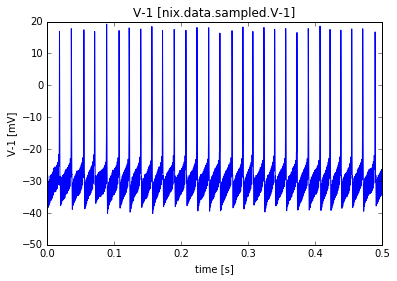

In [23]:
howmany = 10000
x = np.arange(0, howmany) * d1.sampling_interval
y = v1.data[:howmany]
plt.plot(x, y)
plt.xlabel('%s [%s]' % (d1.label, d1.unit))
plt.ylabel('%s [%s]' % (v1.label, v1.unit))
plt.title('%s [%s]' % (v1.name, v1.type))
plt.xlim([np.min(x), np.max(x)])

Since the number of dimensions and the the type of the dimensions, label, sampling rate, etc is all we need to plot the data, we can actually write a generic plotting class. Let's do just that:

In [25]:
from plotting import Plotter

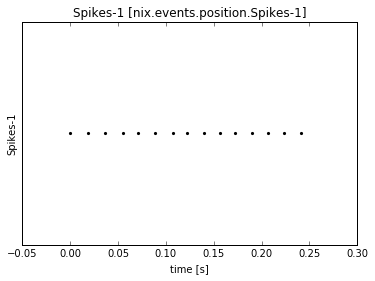

In [26]:
pl = Plotter()
pl.xrange = np.s_[0:15]
pl.add_plot(block.data_arrays['b9425dc9-2d3b-4062-9ce7-eca6c2414510'])

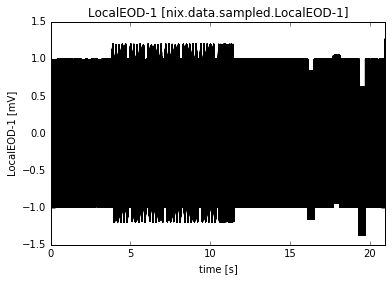

In [27]:
pl = Plotter()
pl.add_plot(block.data_arrays['84cfeb28-c41a-4ff0-bd3f-d581b6250aa0'])

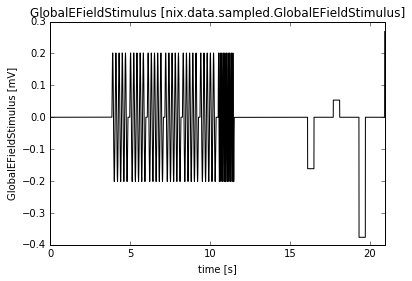

In [28]:
pl = Plotter()
pl.add_plot(block.data_arrays['f418663e-0fd2-46d9-9d28-cb2488b426a2'])

In [32]:
#File is created with gen-demo-data.py
nf = nix.File.open("demo.h5", nix.FileMode.ReadOnly)
print(nf.blocks)

block = nf.blocks[0]
mea = block.data_arrays['MEA']
print(mea.data.shape)
print("Sampling intervals: ", mea.dimensions[0].sampling_interval, mea.dimensions[0].unit, mea.dimensions[1].sampling_interval, mea.dimensions[1].unit)


[Block: {name = test block, type = recordingsession, id = 0e34fc21-145e-430b-a0b8-71b34e231073}]
(116, 59)
Sampling intervals:  7.4 um 14.8 um


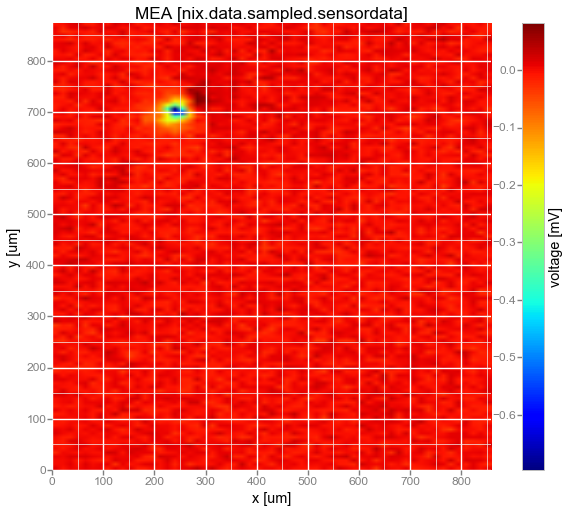

In [26]:
pl = Plotter()
pl.add_plot(mea)

Video Data Example
==================

Let's look at some video data recorded via the [guppy tool](https://github.com/jgrewe/guppy).

In [ ]:
import cv2

In [ ]:
nf = nix.File.open("2014-08-22_0.h5", nix.FileMode.ReadOnly)
block = nf.blocks[0]

In [28]:
for da in block.data_arrays:
    print("%10s\t%s \t [%s]" % (da.name, da.type, da.id))

tag extents	nix.event.extents 	 [0132ee05-29db-4da5-918d-eb63ea9b26d6]
 tag times	nix.event.positions 	 [67cc83d6-b6c4-476b-ad0a-2c2613eefd88]
     video	nix.stamped_video_RGB 	 [5eeae436-db18-48e1-a7ed-2b73deb25014]


In [29]:
video = block.data_arrays['5eeae436-db18-48e1-a7ed-2b73deb25014']

In [30]:
print(video.data.shape)

(580, 752, 3, 65)


Ok, we have 4 dimensions, we need to look at them to find out how the data was stored

In [31]:
for i, d in enumerate(video.dimensions):
    print('%d: %s' % (i+1, d.dimension_type))
    if d.dimension_type == nix.DimensionType.Sample:
        print(' %s ' % d.label)
    if d.dimension_type == nix.DimensionType.Set:
        print(d.labels)
    if d.dimension_type == nix.DimensionType.Range:
        print("%s [%s]" % (d.label, d.unit))
        print(d.ticks)
    print('')

1: Sample
 height 

2: Sample
 width 

3: Set
('R', 'G', 'B')

4: Range
time [ms]
(0.0, 11.0, 107.0, 180.0, 247.0, 295.0, 363.0, 395.0, 483.0, 512.0, 566.0, 647.0, 676.0, 729.0, 817.0, 846.0, 932.0, 961.0, 1044.0, 1115.0, 1144.0, 1245.0, 1273.0, 1366.0, 1432.0, 1488.0, 1516.0, 1599.0, 1668.0, 1717.0, 1749.0, 1792.0, 1888.0, 1916.0, 2001.0, 2030.0, 2121.0, 2185.0, 2242.0, 2271.0, 2352.0, 2382.0, 2472.0, 2503.0, 2583.0, 2612.0, 2702.0, 2729.0, 2817.0, 2846.0, 2938.0, 2965.0, 3054.0, 3123.0, 3174.0, 3205.0, 3258.0, 3340.0, 3369.0, 3425.0, 3519.0, 3549.0, 3607.0, 3695.0, 3723.0)



Say we wanna see the red channel of the first frame.

In [32]:
f1_r = video.data[:, :, 0, 0]

In [33]:
print(f1_r.shape)

(580, 752)


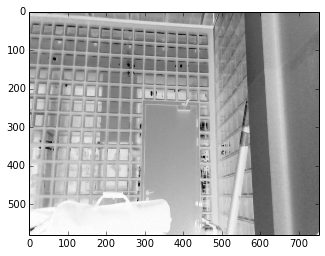

In [34]:
plt.imshow(f1_r, cmap=mpl.cm.get_cmap('Greys'))

In [ ]:
#not really working here in the IPython notebook
for k in range(0, video.data.shape[3]):
    img = video.data[:, :, :, k]
#    cv2.imshow('frame', img)

Guppy has recorded some events for us. They are stored in multi_tags.

In [35]:
for t in block.multi_tags:
    print("%s %s [%s]"  % (t.name, t.type, t.id))

tags nix.event.behavior [76ebce5e-79aa-4886-af10-20e13bd76066]


In [36]:
mt = block.multi_tags['76ebce5e-79aa-4886-af10-20e13bd76066']
pos, ext = mt.positions, mt.extents
print(pos.data.shape)
for k in range(pos.data.shape[1]):
    print('tag: %d' % k)
    print(' pos: %s' % str(pos.data[:, k]))
    print(' ext: %s' % str(ext.data[:, k]))
    print('')

(4, 2)
tag: 0
 pos: [    0.     0.     0.  1888.]
 ext: [ 580.  752.    3.    1.]

tag: 1
 pos: [    0.     0.     0.  2938.]
 ext: [ 580.  752.    3.    1.]



Ok, fetch the first tagged event, get the index manually (there is also an utility function for it, but we wanna demonstrate how it can be done) and then plot it.

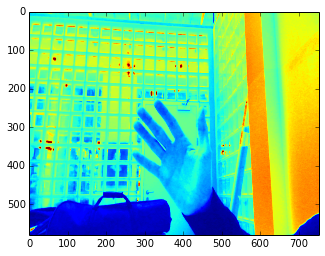

In [37]:
f_pos_t = pos.data[3, 0]
f_pos_i = filter(lambda x: x[1] == f_pos_t, enumerate(video.dimensions[3].ticks))[0][0]
f_tagged = video.data[:, :, 1, f_pos_i]
plt.imshow(f_tagged)